In [18]:
%matplotlib notebook
import numpy as np
import scipy.spatial
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns
import os
from cmapPy.pandasGEXpress.parse import parse
from utils.replicateCorrs import replicateCorrs
from importlib import reload
sns.set_style("whitegrid")

In [6]:
# np.__version__

###  Cell Painting morphological (CP) and L1000 gene expression (GE) profiles for the following datasets:
 
- **CDRPBIO**-BBBC047-Bray-CP-GE (Cell line: U2OS) : 
    * $\bf{CP}$ There are 30,430 unique compounds for CP dataset, median number of replicates --> 4
    * $\bf{GE}$ There are 21,782 unique compounds for GE dataset, median number of replicates --> 3
    * 20,358 compounds are present in both datasets.
    
    
- **LUAD**-BBBC041-Caicedo-CP-GE (Cell line: A549) : 
    * $\bf{CP}$ There are 593 unique alleles for CP dataset, median number of replicates --> 8
    * $\bf{GE}$ There are 529 unique alleles for GE dataset, median number of replicates --> 8
    * 525 alleles are present in both datasets.
    
    
- **TA-ORF**-BBBC037-Rohban-CP-GE (Cell line: U2OS) :
    * $\bf{CP}$ There are 299 unique alleles for CP dataset, median number of replicates --> 8
    * $\bf{GE}$ There are 226 unique alleles for GE dataset, median number of replicates --> 3
    * 188 alleles are present in both datasets.
    
--------------------------------------------


###  Input / ouput files:
 
- **CDRPBIO**-BBBC047-Bray-CP-GE (Cell line: U2OS) : 
    * $\bf{CP}$ 
        * Input:
        * Output:
        
    * $\bf{GE}$ 
        * Input: .mat files that are generated using https://github.com/broadinstitute/2014_wawer_pnas
        * Output:
    
- **LUAD**-BBBC041-Caicedo-CP-GE (Cell line: A549) : 
    * $\bf{CP}$ 
        * Input:
        * Output:
        
    * $\bf{GE}$ 
        * Input:
        * Output:
    
- **TA-ORF**-BBBC037-Rohban-CP-GE (Cell line: U2OS) :
    * $\bf{CP}$ 
        * Input:
        * Output:
        
    * $\bf{GE}$ 
        * Input:  https://data.broadinstitute.org/icmap/custom/TA/brew/pc/TA.OE005_U2OS_72H/
        * Output:

### Reformat L1000 Data:
- It is usually in .gctx format
- Usefull link to read this format: https://github.com/cmap/cmapPy/blob/master/tutorials/cmapPy_pandasGEXpress_tutorial.ipynb

#### L1000 - TA_ORF 
- TA.OE005_U2OS_72H_QNORM_n729x978.gctx  
- TA.OE005_U2OS_72H_ZSPCQNORM_n729x978.gctx  

In [2]:
# ls ../../raw_profiles/l1000_TA_ORF
# df1.loc[:,featColNames].T.corr()

In [3]:
# taorf_l1k_df
# gene_info[['pert_id','x_genesymbol_mutation','pert_iname']]

In [4]:
# gene_info.groupby(['x_genesymbol_mutation']).size().describe()
# gene_info.columns

In [12]:
taorf_datadir='../../raw_profiles/l1000_TA_ORF/'
gene_info = pd.read_csv(taorf_datadir+"TA.OE005_U2OS_72H.map.txt", sep="\t", dtype=str)
# gene_info.columns
# TA.OE005_U2OS_72H_INF_n729x22268.gctx
# TA.OE005_U2OS_72H_QNORM_n729x978.gctx
# TA.OE005_U2OS_72H_ZSPCINF_n729x22268.gctx
# TA.OE005_U2OS_72H_ZSPCQNORM_n729x978.gctx
taorf_l1k0 = parse(taorf_datadir+"TA.OE005_U2OS_72H_ZSPCQNORM_n729x978.gctx")
# taorf_l1k0 = parse(taorf_datadir+"TA.OE005_U2OS_72H_QNORM_n729x978.gctx")
taorf_l1k_df0=taorf_l1k0.data_df
taorf_l1k_df=taorf_l1k_df0.T.reset_index()
l1k_features=taorf_l1k_df.columns[taorf_l1k_df.columns.str.contains("_at")]
taorf_l1k_df=taorf_l1k_df.rename(columns={"cid":"id"})
taorf_l1k_df2=pd.merge(taorf_l1k_df, gene_info, how='inner',on=['id'])
# print(taorf_l1k_df.shape,gene_info.shape,taorf_l1k_df2.shape)
taorf_l1k_df2.head()
# x_genesymbol_mutation
taorf_l1k_df2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/TA-ORF-BBBC037-Rohban/L1000/replicate_level_l1k.csv',index=False)
print(gene_info.shape,taorf_l1k_df.shape,taorf_l1k_df2.shape)
# gene_info.head()

(729, 40) (729, 979) (729, 1018)


In [53]:
# taorf_l1k_df2['pert_id'].unique().shape
taorf_l1k_df2.columns

Index(['id', '200814_at', '218597_s_at', '217140_s_at', '209253_at',
       '214404_x_at', '222103_at', '219888_at', '207042_at', '201453_x_at',
       ...
       'pool_id', 'provenance_code', 'qc_f_logp', 'qc_iqr', 'qc_slope',
       'rna_plate', 'rna_well', 'x_genesymbol_mutation', 'zmad_ref',
       'zmad_ref_well'],
      dtype='object', length=1018)

In [14]:
# taorf_l1k_df2.pert_id

In [54]:
# taorf_l1k_df2.groupby(['x_genesymbol_mutation']).size().describe()
len(l1k_features)

978

In [47]:
df1#.groupby('pert_id').size()#[l1k_features]#.apply(lambda s: s.sample(1))

,id,200814_at,218597_s_at,217140_s_at,209253_at,214404_x_at,222103_at,219888_at,207042_at,201453_x_at,...,pool_id,provenance_code,qc_f_logp,qc_iqr,qc_slope,rna_plate,rna_well,x_genesymbol_mutation,zmad_ref,zmad_ref_well
0,TA.OE005_U2OS_72H_X1_B15:A03,0.1206,-1.5736,-0.6155,-1.9827,0.8250,-3.7235,2.7919,10.4618,-2.2235,...,epsilon,KMV+F2D+INO+QNO+ZSP,6.1,14.02,67,TA.OE005_U2OS_72H_X1,A03,ATF4,population,all
1,TA.OE005_U2OS_72H_X1_B15:A04,-0.7540,-3.0963,0.8055,-1.4489,1.3506,-4.2614,1.5854,-1.6879,1.2582,...,epsilon,KMV+F2D+INO+QNO+ZSP,5,13.15,64,TA.OE005_U2OS_72H_X1,A04,TSC2,population,all
2,TA.OE005_U2OS_72H_X1_B15:A05,0.7575,-0.5961,0.1467,-1.8557,1.2463,-3.3940,2.0723,-1.6483,-0.4414,...,epsilon,KMV+F2D+INO+QNO+ZSP,5.4,12.37,65,TA.OE005_U2OS_72H_X1,A05,BAX,population,all
3,TA.OE005_U2OS_72H_X1_B15:A06,-1.6981,-0.5644,0.0000,1.0091,0.7099,-0.5928,-0.7333,0.1000,0.5226,...,epsilon,KMV+F2D+INO+QNO+ZSP,5.8,8.62,63,TA.OE005_U2OS_72H_X1,A06,VEGFC,population,all
4,TA.OE005_U2OS_72H_X1_B15:A07,-1.5586,0.7878,0.6450,-0.7934,1.5944,0.0023,-1.8069,1.7206,-0.1506,...,epsilon,KMV+F2D+INO+QNO+ZSP,5.6,10.37,64,TA.OE005_U2OS_72H_X1,A07,CCND1,population,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,TA.OE005_U2OS_72H_X2.A2_B18:P16,-0.2333,-1.3819,-2.9242,-0.0762,0.5949,-2.5932,1.3336,4.2193,0.1152,...,epsilon,KMV+F2D+INO+QNO+ZSP,7,10.88,61,TA.OE005_U2OS_72H_X2.A2,P16,ARNTL,population,all
723,TA.OE005_U2OS_72H_X2.A2_B18:P17,-1.2531,-1.2790,-0.3132,-1.9942,1.2314,-2.9730,-1.0205,1.4038,1.3534,...,epsilon,KMV+F2D+INO+QNO+ZSP,5.3,11.46,64,TA.OE005_U2OS_72H_X2.A2,P17,eGFP,population,all
724,TA.OE005_U2OS_72H_X2.A2_B18:P18,1.3473,-0.6128,-1.4873,-0.3653,-0.5113,-0.4174,4.2562,4.2338,0.2181,...,epsilon,KMV+F2D+INO+QNO+ZSP,6.4,11.84,63,TA.OE005_U2OS_72H_X2.A2,P18,eGFP,population,all
725,TA.OE005_U2OS_72H_X2.A2_B18:P19,-1.4250,0.8662,-1.3167,-2.1928,0.0650,0.5794,-2.0558,0.6589,-0.0992,...,epsilon,KMV+F2D+INO+QNO+ZSP,7.3,12.89,63,TA.OE005_U2OS_72H_X2.A2,P19,eGFP,population,all


In [15]:
# taorf_l1k_df2.groupby(['pert_id']).size().describe()
df1=taorf_l1k_df2[taorf_l1k_df2['pert_id']!='CMAP-000']
uniqeSamplesFromEachPurt=df1.groupby('pert_id')[l1k_features].apply(lambda s: s.sample(1))
corrMatAcrossPurtbs=uniqeSamplesFromEachPurt.loc[:,l1k_features].T.corr()
randCorrVals=corrMatAcrossPurtbs.values[np.triu_indices(corrMatAcrossPurtbs.shape[0], k = 1)]
# ar3=np.triu(df2.values, k=1)
# plt.matshow(ar3)
# plt.show()

In [42]:
# np.triu_indices(df2.shape[0], k = 1)
# randCorrVals.shape

(53301,)

<IPython.core.display.Javascript object>


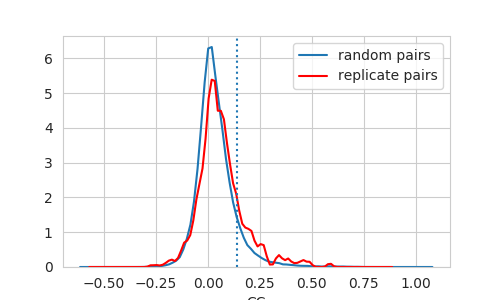

<IPython.core.display.Javascript object>


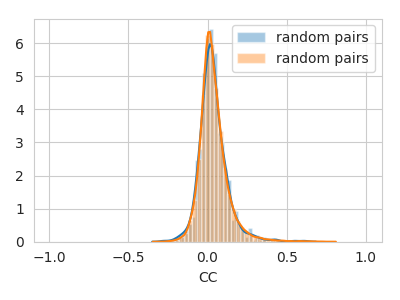

In [30]:
randC,repC,randC_v2=x[0],x[1],x[2]
fig, axes = plt.subplots(figsize=(5,3))
# sns.kdeplot(randC, bw=.1, label="random pairs",ax=axes)
sns.kdeplot(randC_v2, bw=.1, label="random pairs",ax=axes);axes.set_xlabel('CC');
sns.kdeplot(repC, bw=.1, label="replicate pairs",ax=axes,color='r');axes.set_xlabel('CC');
#         perc5=np.percentile(repCC, 50);axes.axvline(x=perc5,linestyle=':',color='darkorange');
perc95=np.percentile(randC_v2, 90);axes.axvline(x=perc95,linestyle=':');
axes.legend();#axes.set_title('');
    
    
fig, axes = plt.subplots(figsize=(4,3))    
sns.distplot(randC,kde=True,hist=True,bins=40,label="random pairs",ax=axes,norm_hist=True);
# sns.distplot(repC,kde=True,hist=True,bins=40,label="replicate pairs",ax=axes,norm_hist=True);
sns.distplot(randC_v2,kde=True,hist=True,bins=40,label="random pairs",ax=axes,norm_hist=True);axes.set_xlabel('CC');
axes.set_xlim(-1.1,1.1)
axes.legend();
plt.tight_layout()
#     return [randC,repC,randC_v2]

<IPython.core.display.Javascript object>


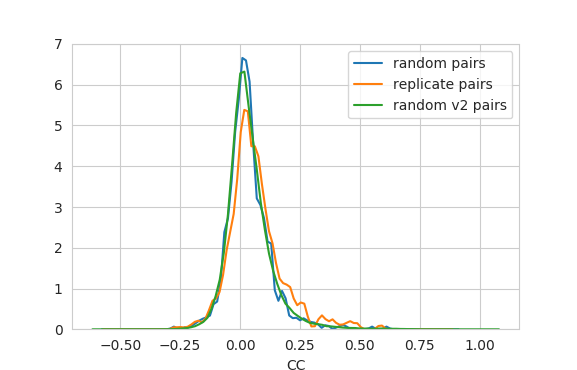

In [16]:
# taorf_l1k_df2['pert_id'].unique()

x=replicateCorrs(df1,'pert_id',l1k_features,1)

<IPython.core.display.Javascript object>


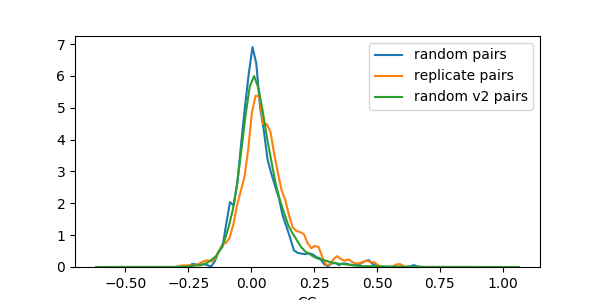

In [113]:
# reload(replicateCorrs)
x=replicateCorrs(df1,'pert_id',l1k_features,1)

In [72]:
# taorf_l1k_df2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/TA-ORF-BBBC037-Rohban/L1000/replicate_level_l1k.csv',index=False)
# taorf_l1k_df2.groupby(['x_genesymbol_mutation']).size()

In [61]:
ls ~/workspace_rosetta/workspace/preprocessed_data/TA-ORF-BBBC037-Rohban/L1000/

replicate_level_l1k.csv        replicate_level_l1k_ZSPCQNORM.csv
replicate_level_l1k_QNORM.csv


#### L1000 - CDRP

In [7]:
ls ../../raw_profiles/l1000_CDRP/

Broad.PNAS2014.ProfilingData/  cdrp.well.metadata.mat  wawer.gene.all.prof.rds
cdrp.all.prof.mat              cdrp.well.pczscore.mat
cdrp.cpd.prof.mat              cdrp.well.prof.mat


In [3]:
cdrp_dataDir='../../raw_profiles/l1000_CDRP/'
cpd_info = pd.read_csv(cdrp_dataDir+"/Broad.PNAS2014.ProfilingData/compounds.txt", sep="\t", dtype=str)
cpd_info.columns

Index(['BROAD_CPD_ID', 'CPD_NAME', 'CPD_TYPE', 'CPD_SMILES'], dtype='object')

In [4]:
## Replicate level profiles
# import rpy2.robjects as robjects
# from rpy2.robjects import pandas2ri
# pandas2ri.activate()
# readRDS = robjects.r['readRDS']

# # load RDS files generated by "data_prepration_reproducible.Rmd"
# df_1 = readRDS(cdrp_dataDir+'wawer.gene.all.prof.rds')
# df_1 = pandas2ri.rpy2py_dataframe(df_1)
# df_1.head()

from scipy.io import loadmat
x = loadmat(cdrp_dataDir+'cdrp.all.prof.mat')

In [12]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'metaCpd', 'metaGen', 'metaNom', 'metaWell', 'nC', 'nG', 'nN', 'nW', 'pclfc', 'pclfc_mean', 'pczscore', 'pczscore_stouffer', 'vclfc', 'vczscore'])

In [5]:
k1=x['metaWell']['pert_id'][0][0]
k2=x['metaGen']['AFFX_PROBE_ID'][0][0]
k3=x['metaWell']['pert_dose'][0][0]
# pert_dose
# x['metaWell']['pert_id'][0][0][0][0][0]
pertID = []
probID=[]
for r in range(len(k1)):
    v = k1[r][0][0]
    pertID.append(v)
#     probID.append(k2[r][0][0])

for r in range(len(k2)):
    probID.append(k2[r][0][0])
    
dataArray=x['pclfc'];
cdrp_l1k_rep = pd.DataFrame(data=dataArray,columns=probID)
cdrp_l1k_rep['pert_id']=pertID
cdrp_l1k_rep['pert_dose']=k3
cdrp_l1k_rep['BROAD_CPD_ID']=cdrp_l1k_rep['pert_id'].str[:13]
cdrp_l1k_rep2=pd.merge(cdrp_l1k_rep, cpd_info, how='left',on=['BROAD_CPD_ID'])
l1k_features_cdrp=cdrp_l1k_rep2.columns[cdrp_l1k_rep2.columns.str.contains("_at")]
# cdrp_l1k_df.head()
print(cpd_info.shape,cdrp_l1k_rep.shape,cdrp_l1k_rep2.shape)
cdrp_l1k_rep2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/CDRPBIO-BBBC036-Bray/L1000/replicate_level_l1k.csv',index=False)
cdrp_l1k_rep2.head()

(32324, 4) (68120, 980) (68120, 983)


,221227_x_at,212345_s_at,218597_s_at,217140_s_at,209253_at,214404_x_at,219888_at,201225_s_at,202535_at,219499_at,...,206414_s_at,204978_at,205379_at,203897_at,pert_id,pert_dose,BROAD_CPD_ID,CPD_NAME,CPD_TYPE,CPD_SMILES
0,-0.118505,-0.293445,-0.294088,0.292745,-0.145896,0.97358,0.247915,-0.159029,-1.249049,0.357185,...,0.498778,0.352153,0.53591,0.52484,BRD-K07762753-001-03-6,50.0,BRD-K07762753,aminopurvalanol A,BIO,CC(C)[C@H](CO)Nc1nc(Nc2cc(N)cc(Cl)c2)c2ncn(C(C...
1,0.043265,-0.264945,-0.000634,0.000935,0.177604,-0.50472,0.214315,0.144271,0.106551,-0.051834,...,-0.225122,0.533052,-0.19329,-0.25436,BRD-K09991945-001-02-0,12.7,BRD-K09991945,GSK-3 inhibitor II,BIO,Ic1cccc(CSc2nnc(o2)-c2ccncc2)c1
2,-0.070806,0.195755,0.004606,-0.040855,-0.067346,-0.19872,-0.053195,0.167971,-0.215449,-0.273714,...,-0.408722,-0.057177,-0.25699,0.31004,BRD-K46678324-001-03-7,50.0,BRD-K46678324,RHO-kinase inhibitor II,BIO,Clc1cc(Cl)c(NC(=O)Nc2ccncc2)c(Cl)c1
3,0.027165,-0.149545,0.173113,-0.100695,-0.309296,-0.20782,-0.323985,0.294872,-0.371449,-0.099914,...,-0.251122,0.040733,0.17091,-0.05144,BRD-K67860401-001-02-3,16.2,BRD-K67860401,GSK-3beta inhibitor VIII,BIO,COc1ccc(CNC(=O)Nc2ncc(s2)[N+]([O-])=O)cc1
4,0.303294,0.254455,-0.055418,-0.053635,0.000455,-0.10908,0.031425,0.044482,0.223351,0.163186,...,0.474878,-0.022948,-0.28589,0.06423,BRD-K52620403-001-01-8,12.5,BRD-K52620403,STO 609,BIO,OC(=O)c1ccc2c3nc4ccccc4n3c(=O)c3cccc1c23


In [31]:
repSizeDF=cdrp_l1k_rep2.groupby(['BROAD_CPD_ID']).size().reset_index()
highRepComp=repSizeDF[repSizeDF[0]>3].BROAD_CPD_ID.tolist()
highRepComp.remove('DMSO')

In [78]:
# cdrp_l1k_rep2.groupby(['BROAD_CPD_ID']).size().describe()
repSizeDF[repSizeDF['BROAD_CPD_ID']=='BRD-K43797669']

,BROAD_CPD_ID,0
10242,BRD-K43797669,193


In [87]:
repSizeDF[repSizeDF[0]>3].sort_values(by=[0])

,BROAD_CPD_ID,0
16309,BRD-K72676686,5
16179,BRD-K72034655,5
2831,BRD-K08438429,5
5933,BRD-K23383398,5
1089,BRD-K00007652,5
...,...,...
16159,BRD-K71879491,190
10242,BRD-K43797669,193
5008,BRD-K18910433,193
2202,BRD-K05396879,715


In [58]:
l1k_features_cdrp=cdrp_l1k_rep2.columns[cdrp_l1k_rep2.columns.str.contains("_at")]
# l1k_features_cdrp

In [59]:
# cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID'].isin(highRepComp)].groupby('BROAD_CPD_ID')[['221227_x_at','212345_s_at','218597_s_at','205500_at']]
# inDf.groupby(pertColName)[featColNames]

In [103]:
repSizeDF.sample(4).reset_index(drop=True)

,BROAD_CPD_ID,0
0,BRD-K31147195,2
1,BRD-K47551852,3
2,BRD-K78556523,3
3,BRD-K68143200,2


<IPython.core.display.Javascript object>


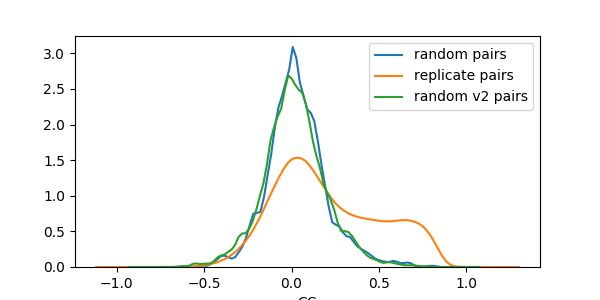

In [110]:
# import utils.replicateCorrs.replicateCorrs
import utils.replicateCorrs
reload(utils.replicateCorrs)
repSizeDF=cdrp_l1k_rep2.groupby(['BROAD_CPD_ID']).size().reset_index()
highRepComp=repSizeDF[repSizeDF[0]>3].BROAD_CPD_ID.tolist()
highRepComp.remove('DMSO')
# highRepComp.remove('BRD-K43797669')
x=utils.replicateCorrs.replicateCorrs(cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID'].isin(highRepComp)],\
                                      'BROAD_CPD_ID',l1k_features_cdrp,1)

In [ ]:
x=replicateCorrs(cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID']!='DMSO'],'BROAD_CPD_ID',l1k_features,1)

In [1]:
# cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID']=='BRD-K00007652'].corrwith(cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID']=='BRD-K43797669'],\
#                                                                        axis = 1,method='pearson').values.tolist()

In [107]:
cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID']=='BRD-K00007652'].corrwith(cdrp_l1k_rep2[cdrp_l1k_rep2['BROAD_CPD_ID']=='BRD-K00007652'],\
                                                                       axis = 1,method='pearson').values.tolist()

[1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999]

In [172]:
# k3=x['metaWell']['pert_dose'][0][0]
# cdrp_l1k_rep['pert_id']=pertID
# cdrp_l1k_rep['pert_dose']=k3
# cdrp_l1k_rep['BROAD_CPD_ID']=cdrp_l1k_rep['pert_id'].str[:13]
# cdrp_l1k_rep2=pd.merge(cdrp_l1k_rep, cpd_info, how='left',on=['BROAD_CPD_ID'])
# # cdrp_l1k_df.head()
# print(cpd_info.shape,cdrp_l1k_rep.shape,cdrp_l1k_rep2.shape)
# cdrp_l1k_rep2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/CDRPBIO-BBBC036-Bray/L1000/replicate_level_l1k.csv',index=False)
# cdrp_l1k_rep2.head()

In [16]:
# treatmentLevel
cdrp_l1k = parse(cdrp_dataDir+"Broad.PNAS2014.ProfilingData/ge.profiles_n21983x977.gctx")
cdrp_l1k_df=cdrp_l1k.data_df.T.reset_index()
cdrp_l1k_df['XX']=cdrp_l1k_df['cid'].str[0]
cdrp_l1k_df['BROAD_CPD_ID']=cdrp_l1k_df['cid'].str[2:15]
cdrp_l1k_df2=pd.merge(cdrp_l1k_df, cpd_info, how='inner',on=['BROAD_CPD_ID'])
# cdrp_l1k_df.head()
print(cpd_info.shape,cdrp_l1k_df.shape,cdrp_l1k_df2.shape)
cdrp_l1k_df2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/CDRPBIO-BBBC036-Bray/L1000/treatment_level_l1k.csv',index=False)

(32324, 4) (21983, 980) (21983, 983)


In [17]:
cdrp_l1k_df2.head()

,cid,221227_x_at,212345_s_at,218597_s_at,217140_s_at,209253_at,214404_x_at,219888_at,201225_s_at,202535_at,...,202801_at,206414_s_at,204978_at,205379_at,203897_at,XX,BROAD_CPD_ID,CPD_NAME,CPD_TYPE,CPD_SMILES
0,1:BRD-K89732114-300-06-3,-815.848145,372.501862,-439.068542,-201.406067,-269.752014,265.633698,-7.044870,-23.993784,-443.847992,...,-2.519104,-103.996338,21.385452,8.454297,-13.765161,1,BRD-K89732114,trifluoperazine,POS,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1
1,2:BRD-K89732114-300-06-3,-684.512024,488.680786,-442.240326,-170.592804,-271.027771,354.551361,113.733376,-110.299194,-679.035767,...,39.128761,-99.362427,96.397514,209.599640,-66.092232,2,BRD-K89732114,trifluoperazine,POS,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1
2,3:BRD-K89732114-300-07-1,-332.084930,413.534698,-285.547913,-292.624268,-214.678284,92.443077,181.307755,-208.432419,-428.033112,...,-108.442131,-14.973925,11.643245,79.470329,-0.310117,3,BRD-K89732114,trifluoperazine,POS,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1
3,4:BRD-K89732114-300-07-1,-1093.123169,1363.475464,-720.515137,-359.339844,-815.420654,366.414734,88.413223,-367.906738,-1077.626831,...,-77.961143,280.649933,-257.341980,434.858887,-291.218781,4,BRD-K89732114,trifluoperazine,POS,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1
4,5:BRD-K89732114-300-07-1,-2170.005859,1454.608276,-2649.765137,-933.394348,-1507.882690,1872.741455,945.424927,-395.551941,-2420.134766,...,1229.749268,839.844727,-591.371643,1262.786499,-590.441895,5,BRD-K89732114,trifluoperazine,POS,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1


In [107]:
# cdrp_l1k_df2.head()
# cdrp_l1k.head()
# cdrp_l1k_df2.groupby(['BROAD_CPD_ID']).size().mean()
# cdrp_l1k_df2.groupby(['CPD_NAME']).size()

#### L1000 - LUAD

In [12]:
ls ../../raw_profiles/l1000_LUAD/input/

TA.Lung_intended_clone_info_150406_confirmations_150407_WT_reference_calls_150420_ref2allele.txt
TA.OE014_A549_96H.map
TA.OE014_A549_96H_ZSPCINF_n2939x22268.gctx
TA.OE015_A549_96H.map
TA.OE015_A549_96H_ZSPCINF_n3006x22268.gctx
high_rep_A549_8reps_141230_eVIP_compare_150421_conn_null.txt
high_rep_A549_8reps_141230_eVIP_compare_150421_rep_null.txt
landmark_probe_ids.grp
lung_control_x_mutation_status.grp


In [18]:
ls ../../raw_profiles/l1000_LUAD/output/

grp_files_141230/
high_rep_A549_8reps_141230.log
high_rep_A549_8reps_141230_COMPZ.MODZ_n529x978.gctx
high_rep_A549_8reps_141230_ZSPCINF_n4232x22268.gctx
high_rep_A549_8reps_141230_ZSPCINF_n4232x978.gctx
high_rep_A549_8reps_141230_n529x22268.gctx
high_rep_A549_8reps_141230_sig.info
high_rep_A549_ZSPCINF_141208_n5945x22268.gctx
high_rep_A549_inst_final_141207.txt


In [114]:
luad_dataDir='../../raw_profiles/l1000_LUAD/'
luad_info1 = pd.read_csv(luad_dataDir+"/input/TA.OE014_A549_96H.map", sep="\t", dtype=str)
luad_info2 = pd.read_csv(luad_dataDir+"/input/TA.OE015_A549_96H.map", sep="\t", dtype=str)
luad_info=pd.concat([luad_info1, luad_info2], ignore_index=True)
luad_info.head()

,id,bead_batch,bead_revision,bead_set,cell_id,count_cv,count_mean,det_mode,det_plate,det_well,...,x_mutation_status,x_not_empty,x_number_orfs_per_gene,x_open_closed,x_orf_numbername,x_preferredgenename,x_protein_match,x_transcriptdb,zmad_ref,zmad_ref_well
0,TA.OE014_A549_96H_X1_B19:A03,b19,r2,"dp52,dp53",A549,25,33,duo,TA.OE014_A549_96H_X1_B19,A03,...,ACAT2_WT.o,-666,2,open,ORF017110.1_TRC317.1,acetoacetyl Coenzyme A thiolase|acetyl-CoA ace...,99.7,NM_005891.2,population,all
1,TA.OE014_A549_96H_X1_B19:A04,b19,r2,"dp52,dp53",A549,25,35,duo,TA.OE014_A549_96H_X1_B19,A04,...,EBNA1BP2_WT.o,-666,2,open,ORF006664.1_TRC317.1,EBNA1-binding protein 2|nuclear FGF3 binding p...,100,NM_006824.2,population,all
2,TA.OE014_A549_96H_X1_B19:A05,b19,r2,"dp52,dp53",A549,25,41,duo,TA.OE014_A549_96H_X1_B19,A05,...,BFP,-666,16,open,ORFC00001.1_TRC317.1,BFP,100,BFP.1,population,all
3,TA.OE014_A549_96H_X1_B19:A06,b19,r2,"dp52,dp53",A549,25,35,duo,TA.OE014_A549_96H_X1_B19,A06,...,HCRED,-666,16,open,ORFC00002.1_TRC317.1,HcRed,100,HcRed.1,population,all
4,TA.OE014_A549_96H_X1_B19:A07,b19,r2,"dp52,dp53",A549,24,55,duo,TA.OE014_A549_96H_X1_B19,A07,...,ABCB9_WT.c,-666,5,close,ORF024050.1_TRC317.1,ABC transporter 9 protein|ATP-binding cassette...,85.6,NM_001243014.1,population,all


In [53]:
# luad_info.shape

In [116]:
# luad_info2.x_mutation_status.unique()

In [117]:
luad_l1k_df = parse(luad_dataDir+"/output/high_rep_A549_8reps_141230_ZSPCINF_n4232x978.gctx").data_df.T.reset_index()
luad_l1k_df=luad_l1k_df.rename(columns={"cid":"id"})
# cdrp_l1k_df['XX']=cdrp_l1k_df['cid'].str[0]
# cdrp_l1k_df['BROAD_CPD_ID']=cdrp_l1k_df['cid'].str[2:15]
luad_l1k_df2=pd.merge(luad_l1k_df, luad_info, how='inner',on=['id'])
luad_l1k_df2=luad_l1k_df2.rename(columns={"x_mutation_status":"allele"})

print(luad_info.shape,luad_l1k_df.shape,luad_l1k_df2.shape)
# luad_l1k_df2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/LUAD-BBBC041-Caicedo/L1000/replicate_level_l1k.csv',index=False)

(5945, 54) (4232, 979) (4232, 1032)


In [118]:
luad_l1k_df2.groupby(['allele']).size()

allele
ABCB9_WT.c        8
ABCB9_WT.o        8
ABCB9_p.R281L     8
ABCB9_p.V140M     8
ACAA1_WT.o        8
                 ..
ZNF597_WT.o       8
ZNF597_p.F16L     8
ZNF597_p.L283V    8
ZNF597_p.R247T    8
ZNF597_p.V21L     8
Length: 529, dtype: int64

<IPython.core.display.Javascript object>


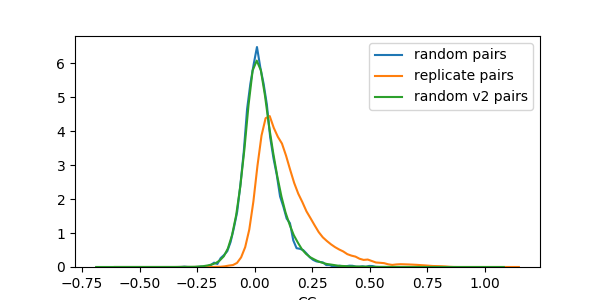

In [120]:
x=utils.replicateCorrs.replicateCorrs(luad_l1k_df2,\
                                      'allele',l1k_features,1)

In [42]:
len(set(luad_l1k_df.id)-set(luad_info.id)), len(set(luad_info.id)-set(luad_l1k_df.id))

(0, 1713)

In [276]:
# cdrp_l1k_df.groupby(['BROAD_CPD_ID']).size()
# gene_info['CPD_TYPE'].unique()

### Reformat Cell-Painting Data Sets

raw data
- CDRP and TA-ORF are in /storage/data/marziehhaghighi/Rosetta/raw-profiles/
- Luad is already processed by Juan, source of the files is at /storage/luad/profiles_cp
 in case you want to reformat

#### CP - LUAD

In [102]:
ls /storage/luad/profiles_cp/LUAD-BBBC043-Caicedo/52649/

52649.csv     52649_augmented.csv   52649_normalized_variable_selected.csv
52649.sqlite  52649_normalized.csv  52649_normalized_variable_selected.gct


In [5]:
Y1=pd.read_csv('~/workspace_rosetta/workspace/preprocessed_data/LUAD-BBBC041-Caicedo/CellPainting/replicate_level_cp.csv')
# Juan preprocessed df .   New
# 'Allele'      ----->    'x_mutation_status'
# 'Category'    ----->    ''??
# 'Clone ID'    ----->    'PublicID'
# 'Gene Symbol' ----->    'Symbol'

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
profileType=['_augmented','_normalized','_normalized_variable_selected']
plates=os.listdir('/storage/luad/profiles_cp/LUAD-BBBC043-Caicedo/')
for pt in profileType:
    repLevelLuad0=[]
    for p in plates:
        repLevelLuad0.append(pd.read_csv('/storage/luad/profiles_cp/LUAD-BBBC043-Caicedo/'+p+'/'+p+pt+'.csv'))
    repLevelLuad = pd.concat(repLevelLuad0)
    metaLuad1=pd.read_csv('~/workspace_rosetta/workspace/raw_profiles/CP_LUAD/metadata/combined_platemaps_AHB_20150506_ssedits.csv')
    metaLuad1=metaLuad1.rename(columns={"PlateName":"Metadata_Plate_Map_Name",'Well':'Metadata_Well'})
    metaLuad1['Metadata_Well']=metaLuad1['Metadata_Well'].str.lower()
    # metaLuad2=pd.read_csv('~/workspace_rosetta/workspace/raw_profiles/CP_LUAD/metadata/barcode_platemap.csv')
    # Y[Y['Metadata_Well']=='g05']['Nuclei_Texture_Variance_Mito_5_0']
    repLevelLuad2=pd.merge(repLevelLuad, metaLuad1, how='inner',on=['Metadata_Plate_Map_Name','Metadata_Well'])
#     repLevelLuad2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/LUAD-BBBC041-Caicedo/CellPainting/replicate_level_cp'+pt+'.csv',index=False)
    print(metaLuad1.shape,repLevelCDRP.shape,repLevelCDRP2.shape)    

(1152, 14) (153370, 1800) (153386, 1804)
(1152, 14) (153370, 1800) (153386, 1804)
(1152, 14) (153370, 1800) (153386, 1804)


In [98]:
print(repLevelLuad2.shape,Y1.shape)

(6144, 322) (4552, 314)


In [ ]:
repLevelLuad2.groupby(['Allele']).describe()

In [89]:
# set(Y1.columns)-set(repLevelLuad2)

In [88]:
# set(repLevelLuad2)-set(Y1.columns)

In [100]:
# Y1[['Allele', 'Category', 'Clone ID', 'Gene Symbol']].head()

In [101]:
# repLevelLuad2[repLevelLuad2['PublicID']=='BRDN0000553807'][['Col','InsertLength','NCBIGeneID','Name','OtherDescriptions','PublicID','Row','Symbol','Transcript','Vector','pert_type','x_mutation_status']].head()

#### CP - CDRP

In [107]:
ls /storage/data/marziehhaghighi/Rosetta/raw-profiles/CDRP/24277/

24277.csv     24277_augmented.csv   24277_normalized_variable_selected.csv
24277.sqlite  24277_normalized.csv


In [4]:
profileType=['_augmented','_normalized','_normalized_variable_selected']
plates=os.listdir('/storage/data/marziehhaghighi/Rosetta/raw-profiles/CDRP/')
for pt in profileType:
    repLevelCDRP0=[]
    for p in plates:
        repLevelCDRP0.append(pd.read_csv('/storage/data/marziehhaghighi/Rosetta/raw-profiles/CDRP/'+p+'/'+p+pt+'.csv'))
    repLevelCDRP = pd.concat(repLevelCDRP0)
    metaCDRP1=pd.read_csv('~/workspace_rosetta/workspace/raw_profiles/CP_CDRP/metadata/metadata_CDRP.csv')
    # metaCDRP1=metaCDRP1.rename(columns={"PlateName":"Metadata_Plate_Map_Name",'Well':'Metadata_Well'})
    # metaCDRP1['Metadata_Well']=metaCDRP1['Metadata_Well'].str.lower()
    repLevelCDRP2=pd.merge(repLevelCDRP, metaCDRP1, how='left',on=['Metadata_broad_sample'])
#     repLevelCDRP2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/CDRPBIO-BBBC036-Bray/CellPainting/replicate_level_cp'+pt+'.csv',index=False)
    print(metaCDRP1.shape,repLevelCDRP.shape,repLevelCDRP2.shape)

(1553, 5) (153370, 1800) (153386, 1804)
(1553, 5) (153370, 1800) (153386, 1804)


FileNotFoundError: [Errno 2] File b'/storage/data/marziehhaghighi/Rosetta/raw-profiles/CDRP/24638/24638_normalized_variable_selected.csv' does not exist: b'/storage/data/marziehhaghighi/Rosetta/raw-profiles/CDRP/24638/24638_normalized_variable_selected.csv'

In [241]:
metaCDRP1.T

,0,1,2,3,4,5,6,7,8,9,...,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552
Metadata_broad_sample,BRD-A01078468-001-04-9,BRD-A01320529-001-05-9,BRD-A01593789-001-01-5,BRD-A01636364-003-04-5,BRD-A01787639-003-08-6,BRD-A02006392-001-06-5,BRD-A02710418-003-03-5,BRD-A02713983-001-02-0,BRD-A03816571-001-01-0,BRD-A04322457-003-03-9,...,BRD-K74212935-001-03-1,BRD-K74765201-001-01-9,BRD-K74913225-001-03-3,BRD-K75615183-001-01-7,BRD-K75641298-001-01-5,BRD-K76133116-001-01-2,BRD-K76274772-001-02-7,BRD-K76587808-001-02-0,BRD-K76775527-001-06-2,BRD-K76872913-001-02-8
Metadata_pert_iname,hexestrol,salmeterol,chlormadinone-acetate,bupivacaine,naftopidil,nitrendipine,meptazinol,NaN,CP-55940,isoprenaline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata_pert_iname2,hexestrol,salmeterol,chlormadinone acetate,bupivacaine,naftopidil,nitrendipine,meptazinol,dihydrodeoxygedunin,BRD-A03816571,isoprenaline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata_moa,synthetic estrogen,adrenergic receptor agonist,5 alpha reductase inhibitor,sodium channel blocker,adrenergic receptor antagonist,calcium channel blocker,opioid receptor agonist,growth factor receptor activator,cannabinoid receptor agonist|CC chemokine rece...,adrenergic receptor agonist,...,Dopamine agonist,Leukotriene receptor antagonist,Carbonic anhydrase inhibitor,Adrenergic receptor agonist,Dopamine receptor antagonist,Membrane integrity inhibitor,Ceramidase inhibitor,Antioxidant,Cyclooxygenase inhibitor,Aromatic hydrocarbon derivative
Metadata_target,"AKR1C1, ESR1, ESR2",ADRB2,PGR,"KCNA5, PTGER1, SCN10A, SCN4A",ADRA1A,"CACNA1C, CACNA1D, CACNA1H, CACNA1S, CACNA2D1, ...",BCHE,NTRK2,"CNR1, CNR2, CXCR4. GPR55","ADRB1, ADRB2, ADRB3, MAPK1, PIK3R1, PIK3R2, PI...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
metaCDRP1[metaCDRP1['Metadata_broad_sample']=='BRD-A01320529-001-05-9'] 
# BRD-A13084692-001-05-8

,Metadata_broad_sample,Metadata_pert_iname,Metadata_pert_iname2,Metadata_moa,Metadata_target
1,BRD-A01320529-001-05-9,salmeterol,salmeterol,adrenergic receptor agonist,ADRB2


#### CP - TA-ORF

In [123]:
ls ~/workspace_rosetta/workspace/raw_profiles/CP_TA_ORF/metadata/

metadata_TA.csv  metadata_TA_2.csv


In [ ]:
# ls /storage/data/marziehhaghighi/Rosetta/raw-profiles/TA-ORF-BBBC037-Rohban/41757
# repLevelTA
# metaTA2

In [152]:
profileType=['_augmented','_normalized','_normalized_variable_selected']
plates=os.listdir('/storage/data/marziehhaghighi/Rosetta/raw-profiles/TA-ORF-BBBC037-Rohban/')
for pt in profileType:
    repLevelTA0=[]
    for p in plates:
        repLevelTA0.append(pd.read_csv('/storage/data/marziehhaghighi/Rosetta/raw-profiles/TA-ORF-BBBC037-Rohban/'+p+'/'+p+pt+'.csv'))
    repLevelTA = pd.concat(repLevelTA0)
    metaTA1=pd.read_csv('~/workspace_rosetta/workspace/raw_profiles/CP_TA_ORF/metadata/metadata_TA.csv')
    metaTA2=pd.read_csv('~/workspace_rosetta/workspace/raw_profiles/CP_TA_ORF/metadata/metadata_TA_2.csv')
#     metaTA2=metaTA2.rename(columns={"Metadata_broad_sample":"Metadata_broad_sample_2",'Metadata_Treatment':'Gene Allele Name'})
    metaTA=pd.merge(metaTA2, metaTA1, how='left',on=['Metadata_broad_sample'])
#     metaTA2=metaTA2.rename(columns={"Metadata_Treatment":"Metadata_pert_name"})
#     repLevelTA2=pd.merge(repLevelTA, metaTA2, how='left',on=['Metadata_pert_name'])
    repLevelTA2=pd.merge(repLevelTA, metaTA, how='left',on=['Metadata_broad_sample'])

#     repLevelTA2=repLevelTA2.rename(columns={"Gene Allele Name":"Allele"})
    repLevelTA2.to_csv('~/workspace_rosetta/workspace/preprocessed_data/TA-ORF-BBBC037-Rohban/CellPainting/replicate_level_cp'+pt+'.csv',index=False)
    print(metaTA.shape,repLevelTA.shape,repLevelTA2.shape)


(323, 4) (1920, 1801) (1920, 1804)
(323, 4) (1920, 1801) (1920, 1804)
(323, 4) (1920, 81) (1920, 84)


In [116]:
repLevelTA[repLevelTA['Metadata_broad_sample'].isnull()]['Metadata_pert_name'].unique()

array(['EMPTY_', 'Luciferase_CTRL', 'LacZ_CTRL', 'eGFP_CTRL'],
      dtype=object)

In [147]:
# repLevelTA.head()

In [146]:
# repLevelTA2['Metadata_pert_name'].unique().shape

In [145]:
# repLevelTA2[~repLevelTA2['Metadata_Treatment'].isnull()]

In [144]:
# metaTA2

In [143]:
# taorf_l1k_df2['Metadata_broad_sample']
# set(repLevelTA2['Metadata_broad_sample'])

In [139]:
len(set(repLevelTA2['Metadata_broad_sample'])-set(taorf_l1k_df2['pert_id']))

175

In [142]:
x=replicateCorrs(df1,'pert_id',l1k_features,1)

148

In [83]:
repLevelTA2['Metadata_Treatment'].unique().shape

(324,)

In [169]:
ls ~/workspace_rosetta/workspace/preprocessed_data/

CDRPBIO-BBBC036-Bray/  LUAD-BBBC041-Caicedo/  TA-ORF-BBBC037-Rohban/


In [7]:
# np.sort(metaTA2['Metadata_Treatment'].unique())
repLevelTA2.head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_gene_name,Metadata_pert_name,Metadata_broad_sample,Metadata_cell_line,Metadata_ASSAY_WELL_ROLE,...,Nuclei_Texture_DifferenceVariance_ER_10_0,Nuclei_Texture_DifferenceVariance_RNA_3_0,Nuclei_Texture_Gabor_RNA_5,Nuclei_Texture_InfoMeas1_AGP_3_0,Nuclei_Texture_InfoMeas1_ER_3_0,Nuclei_Texture_InverseDifferenceMoment_DNA_10_0,Nuclei_Texture_Variance_ER_10_0,Metadata_moa,Allele,Metadata_broad_sample_2
0,41757,a01,41757,TAORF_REFERENCE_SET,a01,EMPTY,EMPTY_,NaN,U2OS,Untreated,...,0.183206,-0.856756,-0.862536,-0.461538,-0.447009,-0.146888,0.324970,NaN,NaN,NaN
1,41757,a02,41757,TAORF_REFERENCE_SET,a02,EMPTY,EMPTY_,NaN,U2OS,Untreated,...,0.155044,-0.495609,-0.523758,-0.270407,-0.217454,0.063475,0.179015,NaN,NaN,NaN
2,41757,a03,41757,TAORF_REFERENCE_SET,a03,ATF4,ATF4_WT.1,ccsbBroad304_00117,U2OS,Treated,...,0.038611,-0.173200,-0.288950,-0.015038,0.203154,0.118011,0.079778,ER Stress/UPR,ATF4_WT.1,ccsbBroad304_00117
3,41757,a04,41757,TAORF_REFERENCE_SET,a04,TSC2,TSC2_WT,ccsbBroad304_07101,U2OS,Treated,...,0.103447,-0.166625,-0.287975,-0.188032,-0.203401,0.091849,0.041468,TOR,TSC2_WT,ccsbBroad304_07101
4,41757,a05,41757,TAORF_REFERENCE_SET,a05,BAX,BAX_WT,ccsbBroad304_00150,U2OS,Treated,...,0.344871,-0.158059,-0.165045,-0.089917,0.017127,0.080408,0.342911,Apoptosis,BAX_WT,ccsbBroad304_00150


In [177]:
# set(metaTA1['Gene Allele Name'].unique())-set(metaTA2['Metadata_Treatment'].unique())

In [10]:
# repLevelTA2.head()
# metaTA2

In [175]:
# Y1

In [150]:
metaTA

,Metadata_broad_sample,Metadata_Treatment,Metadata_moa,Gene Allele Name
0,ccsbBroad304_00117,ATF4_WT.1,ER Stress/UPR,ATF4_WT.1
1,ccsbBroad304_07101,TSC2_WT,TOR,TSC2_WT
2,ccsbBroad304_00150,BAX_WT,Apoptosis,BAX_WT
3,ccsbBroad304_07127,VEGFC_WT.1,Hypoxia,VEGFC_WT.1
4,ccsbBroad304_00155,CCND1_WT.1,Cell Cycle,CCND1_WT.1
...,...,...,...,...
318,ccsbBroad304_00047,AKT2_WT,NaN,NaN
319,BRDN0000464974,XBP1_S,NaN,NaN
320,ccsbBroad304_00100,RHOA_WT,Cytoskeletal Re-org,RHOA_WT
321,BRDN0000464975,RHOA_T19N,NaN,NaN


In [156]:
x=pd.read_csv('~/workspace_rosetta/workspace/preprocessed_data/TA-ORF-BBBC037-Rohban/CellPainting/replicate_level_cp_normalized_variable_selected.csv')

In [157]:
x2=x[~x['Metadata_broad_sample'].isnull()]

In [158]:
x2.head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_gene_name,Metadata_pert_name,Metadata_broad_sample,Metadata_cell_line,Metadata_ASSAY_WELL_ROLE,...,Nuclei_Texture_DifferenceVariance_ER_10_0,Nuclei_Texture_DifferenceVariance_RNA_3_0,Nuclei_Texture_Gabor_RNA_5,Nuclei_Texture_InfoMeas1_AGP_3_0,Nuclei_Texture_InfoMeas1_ER_3_0,Nuclei_Texture_InverseDifferenceMoment_DNA_10_0,Nuclei_Texture_Variance_ER_10_0,Metadata_Treatment,Metadata_moa,Gene Allele Name
2,41757,a03,41757,TAORF_REFERENCE_SET,a03,ATF4,ATF4_WT.1,ccsbBroad304_00117,U2OS,Treated,...,0.038611,-0.173200,-0.288950,-0.015038,0.203154,0.118011,0.079778,ATF4_WT.1,ER Stress/UPR,ATF4_WT.1
3,41757,a04,41757,TAORF_REFERENCE_SET,a04,TSC2,TSC2_WT,ccsbBroad304_07101,U2OS,Treated,...,0.103447,-0.166625,-0.287975,-0.188032,-0.203401,0.091849,0.041468,TSC2_WT,TOR,TSC2_WT
4,41757,a05,41757,TAORF_REFERENCE_SET,a05,BAX,BAX_WT,ccsbBroad304_00150,U2OS,Treated,...,0.344871,-0.158059,-0.165045,-0.089917,0.017127,0.080408,0.342911,BAX_WT,Apoptosis,BAX_WT
5,41757,a06,41757,TAORF_REFERENCE_SET,a06,VEGFC,VEGFC_WT.1,ccsbBroad304_07127,U2OS,Treated,...,0.134264,-0.026014,-0.261035,-0.090864,-0.027993,0.051024,0.132025,VEGFC_WT.1,Hypoxia,VEGFC_WT.1
6,41757,a07,41757,TAORF_REFERENCE_SET,a07,CCND1,CCND1_WT.1,ccsbBroad304_00155,U2OS,Treated,...,0.188731,0.104063,0.066928,-0.093142,-0.087166,-0.175200,0.100237,CCND1_WT.1,Cell Cycle,CCND1_WT.1


In [159]:
x2['Metadata_moa']

2             ER Stress/UPR
3                       TOR
4                 Apoptosis
5                   Hypoxia
6                Cell Cycle
               ...         
1907                    NaN
1908                    NaN
1909    Cytoskeletal Re-org
1910                    NaN
1911       Circadian Rhythm
Name: Metadata_moa, Length: 1625, dtype: object

In [126]:
x2.groupby(['Metadata_broad_sample']).size().describe()#.describe()

count    323.000000
mean       5.030960
std        0.392833
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       10.000000
dtype: float64

In [17]:
x['Allele'].unique().shape

(206,)

In [125]:
x.shape,x2.shape

((1920, 1802), (1625, 1802))

In [63]:
x['Metadata_Treatment']

0             NaN
1             NaN
2       ATF4_WT.1
3         TSC2_WT
4          BAX_WT
          ...    
1915          NaN
1916          NaN
1917          NaN
1918          NaN
1919          NaN
Name: Metadata_Treatment, Length: 1920, dtype: object

In [128]:
x2['Metadata_pert_name'].unique()

array(['ATF4_WT.1', 'TSC2_WT', 'BAX_WT', 'VEGFC_WT.1', 'CCND1_WT.1',
       'VHL_WT.1', 'BMPR1B_WT.1', 'AXIN2_WT.1', 'BRCA1_WT', 'CASP9_WT',
       'AKT3_WT.1', 'TBK1_WT.1', 'CDK2_WT.1', 'IRAK4_WT', 'CDK4_WT.1',
       'ATM_WT.1', 'CDKN1A_WT', 'ATM_WT.2', 'MAP3K8_WT', 'CASP8_WT.1',
       'EIF2A_WT.1', 'CTNNB1_S33A.S37A.T41A.T45A', 'GSK3B_WT.1',
       'PRKCA_K368R', 'MAP3K2_WT.1', 'CARD11_F123I.mismatch', 'ARAF_WT.1',
       'CARD11_L225LI', 'XBP1_WT.1', 'CDC42_Q61L', 'HSPA5_WT', 'VHL_WT.2',
       'RAF1_L613V', 'GSK3B_WT.2', 'RAC1_Q61L', 'EIF4E_WT.1', 'RAC1_T17N',
       'RB1_WT.1.mismatch', 'PRKCE_K437R.mismatch', 'RHOA_Q63L',
       'CREB1_WT', 'DVL1_WT.1', 'NOTCH2_WT', 'ATF2_WT', 'PIK3R2_WT',
       'MAPK14_WT.1', 'PPP2R5C_WT.1', 'CSNK1E_WT.1', 'RELA_WT.1',
       'DVL2_WT', 'ADAM17_WT', 'EIF4EBP1_WT', 'ELK1_WT', 'TGFBR2_WT.1',
       'FH_WT', 'EGLN1_WT.1.mismatch', 'RICTOR_WT', 'IKBKB_WT',
       'ACVR1B_WT.1', 'IRS1_WT', 'AKT1_WT.1', 'XIAP_WT.1', 'TGFBR1_K232R',
       'CDC42_WT

In [107]:
x2.groupby(['Metadata_pert_name']).size().

count    327.000000
mean       5.871560
std        9.965678
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max      175.000000
dtype: float64

In [ ]:
.
├── preprocessed_data
│   ├── CDRPBIO-BBBC036-Bray
│   │   ├── CellPainting
│   │   ├── L1000
│   │   └── metadata
│   ├── LUAD-BBBC041-Caicedo
│   │   ├── CellPainting
│   │   ├── L1000
│   │   └── metadata
│   └── TA-ORF-BBBC037-Rohban
│       ├── CellPainting
│       ├── L1000
│       └── metadata
├── raw_profiles
│   ├── CP_CDRP
│   │   └── metadata
│   ├── CP_LUAD
│   │   └── metadata
│   ├── CP_TA_ORF
│   │   └── metadata
│   ├── l1000_CDRP
│   │   ├── Broad.PNAS2014.ProfilingData

│   │   ├── cdrp.cpd.prof.mat
│   │   ├── cdrp.well.metadata.mat
│   │   ├── cdrp.well.pczscore.mat
│   │   ├── cdrp.well.prof.mat
│   │   ├── compounds.txt
│   │   ├── ge.profiles_n21983x977.gct
│   │   ├── ge.profiles_n21983x977.gctx
│   │   ├── hts.hitcounts.txt
│   │   ├── mc.profiles_n30439x812.gct
│   │   ├── mc.profiles_n30439x812.gctx
│   │   ├── readme.txt
│   │   └── wawer.gene.all.prof.rds
│   ├── l1000_LUAD
│   │   ├── input
│   │   └── output
│   └── l1000_TA_ORF
│       ├── ignored_plates_d2.grp.txt
│       ├── Index of _icmap_custom_TA_brew_pc_TA.OE005_U2OS_72H_files
│       ├── Index of _icmap_custom_TA_brew_pc_TA.OE005_U2OS_72H.html
│       ├── plates_d2.grp.txt
│       ├── README
│       ├── splice_pipe_params.txt
│       ├── TA.OE005_U2OS_72H_by_pert_id_pert_dose_files
│       ├── TA.OE005_U2OS_72H_by_pert_id_pert_dose.html
│       ├── TA.OE005_U2OS_72H_by_rna_well_files
│       ├── TA.OE005_U2OS_72H_by_rna_well.html
│       ├── TA.OE005_U2OS_72H_INF_n729x22268.gctx
│       ├── TA.OE005_U2OS_72H.map.txt
│       ├── TA.OE005_U2OS_72H_QNORM_n729x978.gctx
│       ├── TA.OE005_U2OS_72H_ZSPCINF_n729x22268.gctx
│       └── TA.OE005_U2OS_72H_ZSPCQNORM_n729x978.gctx